In [148]:
from GStools import input_tools
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = '/Volumes/Macintosh HD 2/Users/magnuswangensteen/Dropbox/PGS/Coding/Geotools/testfiles/env_mod/Wintershall_Ravn/'

In [15]:
filename_sel_3150 = '3150T__070_2000_080_ufilt.E2N'
filename_spl_3150 = '3150T__070_2000_080_ufilt.E1N'
filename_sel_2440 = '2440T__070_2000_080_ufilt.E2N'
filename_spl_2440 = '2440T__070_2000_080_ufilt.E1N'
filename_sel_3660 = '3660T__070_2000_080_ufilt.E2N'
filename_spl_3660 = '3660T__070_2000_080_ufilt.E1N'

In [16]:
file_sel_3150 = file_path + filename_sel_3150
file_spl_3150 = file_path + filename_spl_3150
file_sel_2440 = file_path + filename_sel_2440
file_spl_2440 = file_path + filename_spl_2440
file_sel_3660 = file_path + filename_sel_3660
file_spl_3660 = file_path + filename_spl_3660

In [17]:
sel_3150 = input_tools.make_df_from_columndata(file_sel_3150)
spl_3150 = input_tools.make_df_from_columndata(file_spl_3150)
sel_2440 = input_tools.make_df_from_columndata(file_sel_2440)
spl_2440 = input_tools.make_df_from_columndata(file_spl_2440)
sel_3660 = input_tools.make_df_from_columndata(file_sel_3660)
spl_3660 = input_tools.make_df_from_columndata(file_spl_3660)

In [22]:
def make_inline(df):
    df = df[df['Crossline'] == 0]
    return df

In [23]:
def make_xline(df):
    df = df[df['Inline'] == 0]
    return df

In [36]:
sel_3150_inline = make_inline(sel_3150)
sel_2440_inline = make_inline(sel_2440)
sel_3660_inline = make_inline(sel_3660)

sel_3150_xline = make_xline(sel_3150)
sel_2440_xline = make_xline(sel_2440)
sel_3660_xline = make_xline(sel_3660)

In [44]:
spl_3150_inline = make_inline(spl_3150)
spl_2440_inline = make_inline(spl_2440)
spl_3660_inline = make_inline(spl_3660)

spl_3150_xline = make_xline(spl_3150)
spl_2440_xline = make_xline(spl_2440)
spl_3660_xline = make_xline(spl_3660)

In [42]:
sel_3150_inline

,Inline,Crossline,Depth,SEL
numRows,,,,
40,-10000.0,0.0,8.0,114.198290
121,-9750.0,0.0,8.0,114.810882
202,-9500.0,0.0,8.0,115.193232
283,-9250.0,0.0,8.0,115.621111
364,-9000.0,0.0,8.0,116.334656
...,...,...,...,...
6196,9000.0,0.0,8.0,116.480248
6277,9250.0,0.0,8.0,115.762104
6358,9500.0,0.0,8.0,115.333784


In [77]:
def plot_xl_il(df_dict, xlil='Crossline', attrib='SEL'):
    plt.figure(figsize=(16, 8))
    sns.set_style('whitegrid')
    for key in df_dict:
#        sns.regplot(x=df_dict[key][xlil], y=df_dict[key][attrib], fit_reg=False, label=key)
        sns.lineplot(x=df_dict[key][xlil], y=df_dict[key][attrib], label=key)
    plt.legend()
    plt.title(attrib)
    plt.show()

In [46]:
df_dict_SEL_inline = {'3150': sel_3150_inline, '2440': sel_2440_inline, '3660': sel_3660_inline}
df_dict_SPL_inline = {'3150': spl_3150_inline, '2440': spl_2440_inline, '3660': spl_3660_inline}
df_dict_SEL_xline = {'3150': sel_3150_xline, '2440': sel_2440_xline, '3660': sel_3660_xline}
df_dict_SPL_xline = {'3150': spl_3150_xline, '2440': spl_2440_xline, '3660': spl_3660_xline}

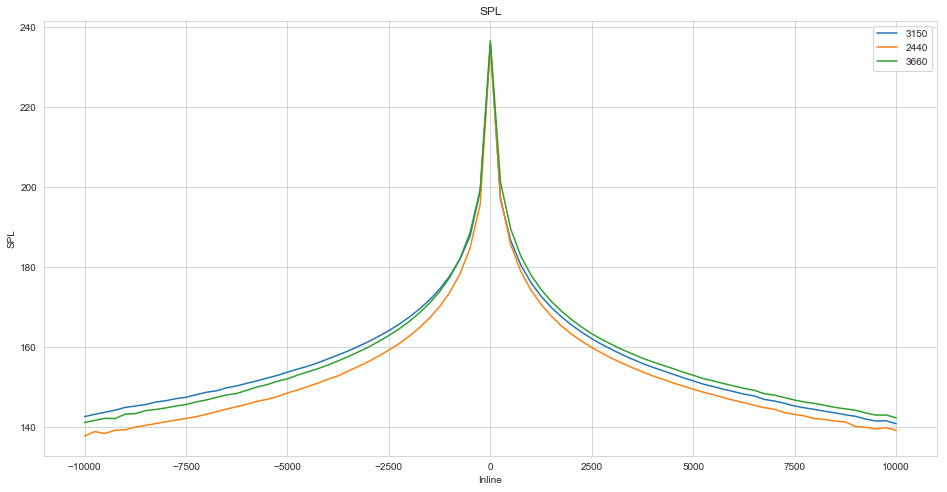

In [180]:
plot_xl_il(df_dict_SPL_inline, 'Inline', 'SPL')

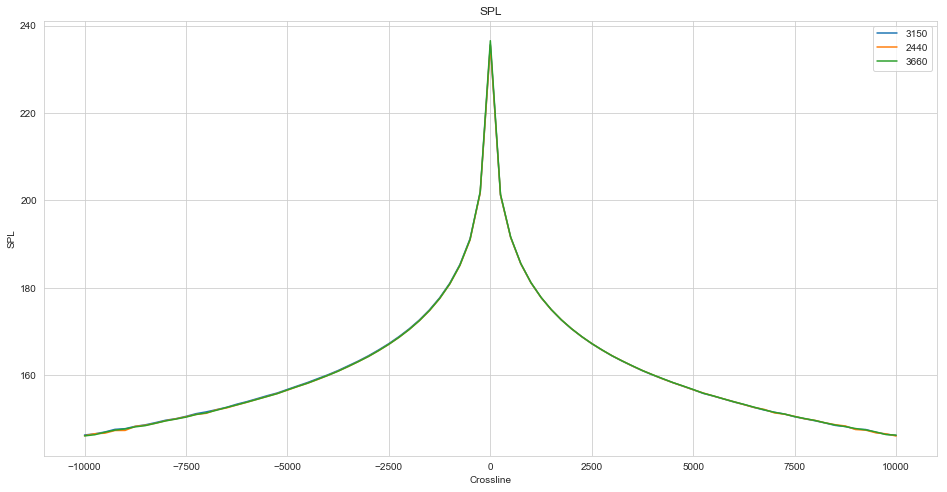

In [181]:
plot_xl_il(df_dict_SPL_xline, 'Crossline', 'SPL')

In [62]:
filenames_spl_xl = {'3150': '3150T__070_2000_080_xl.E1N',
                    '2440': '2440T__070_2000_080_xl.E1N',
                    '3660': '3660T__070_2000_080_xl.E1N'}
filenames_sel_xl = {'3150': '3150T__070_2000_080_xl.E2N',
                    '2440': '2440T__070_2000_080_xl.E2N',
                    '3660': '3660T__070_2000_080_xl.E2N'}


In [63]:
filenames_spl_il = {'3150': '3150T__070_2000_080_il.E1N',
                    '2440': '2440T__070_2000_080_il.E1N',
                    '3660': '3660T__070_2000_080_il.E1N'}
filenames_sel_il = {'3150': '3150T__070_2000_080_il.E2N',
                    '2440': '2440T__070_2000_080_il.E2N',
                    '3660': '3660T__070_2000_080_il.E2N'}


In [139]:
def make_df_dict(filenames_dict):
    df_dict = {}
    for key in filenames_dict:
        df_dict[key] = input_tools.make_df_from_columndata(file_path+filenames_dict[key])
        df_dict[key]['Volume'] = key
    return df_dict

In [140]:
df_dict_SPL_xl_near = make_df_dict(filenames_spl_xl)
df_dict_SPL_il_near = make_df_dict(filenames_spl_il)
df_dict_SEL_xl_near = make_df_dict(filenames_sel_xl)
df_dict_SEL_il_near = make_df_dict(filenames_sel_il)

In [141]:
df_dict_SPL_xl_near['3150']

,Inline,Crossline,Depth,SPL,Volume
numRows,,,,,
0,-1700.0,0.0,8.0,169.951753,3150
1,-1699.0,0.0,8.0,169.957467,3150
2,-1698.0,0.0,8.0,169.967661,3150
3,-1697.0,0.0,8.0,169.970316,3150
4,-1696.0,0.0,8.0,169.989585,3150
...,...,...,...,...,...
3396,1696.0,0.0,8.0,168.104266,3150
3397,1697.0,0.0,8.0,168.087148,3150
3398,1698.0,0.0,8.0,168.090212,3150


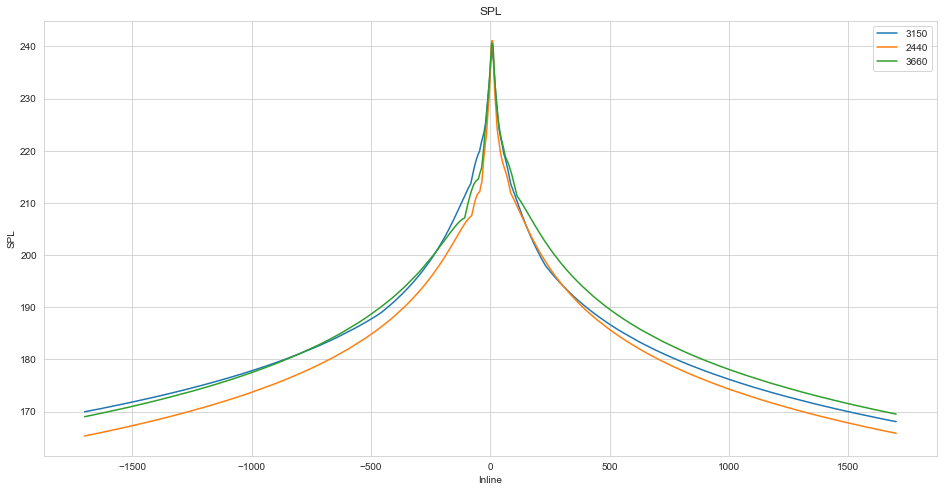

In [142]:
plot_xl_il(df_dict_SPL_xl_near, 'Inline', 'SPL')

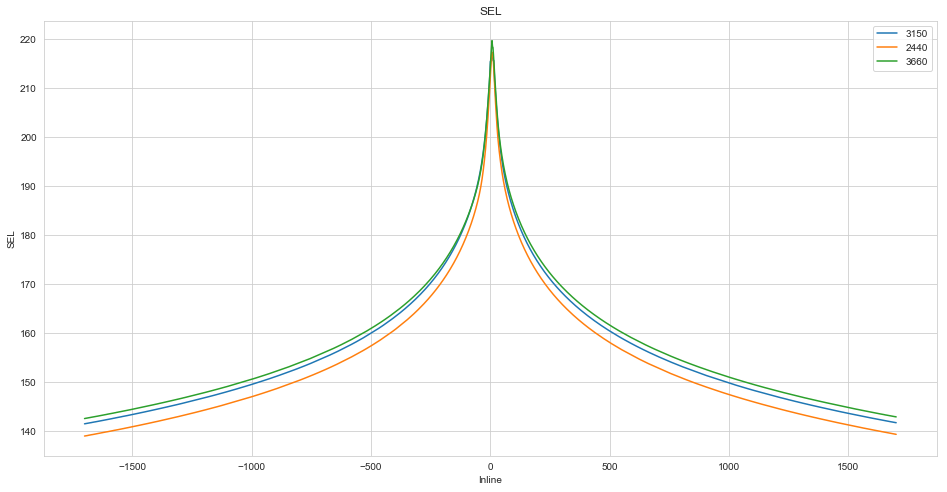

In [143]:
plot_xl_il(df_dict_SEL_xl_near, 'Inline', 'SEL')

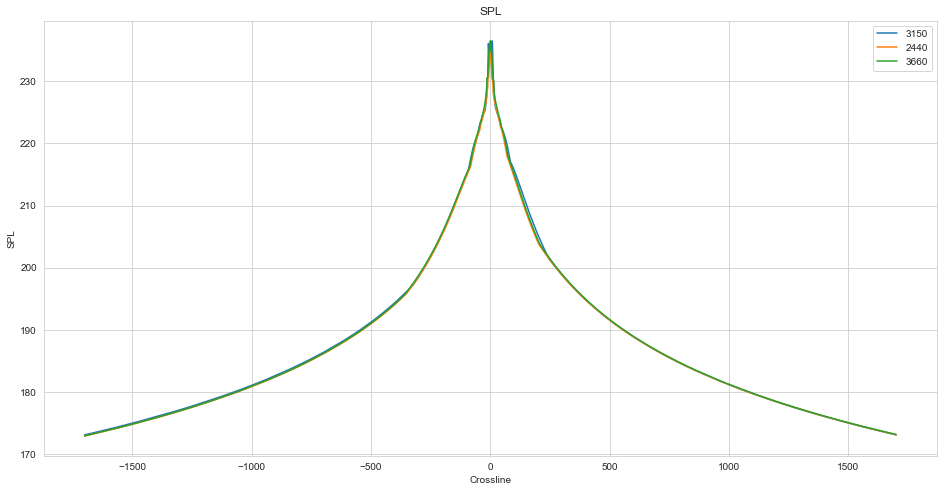

In [144]:
plot_xl_il(df_dict_SPL_il_near, 'Crossline', 'SPL')

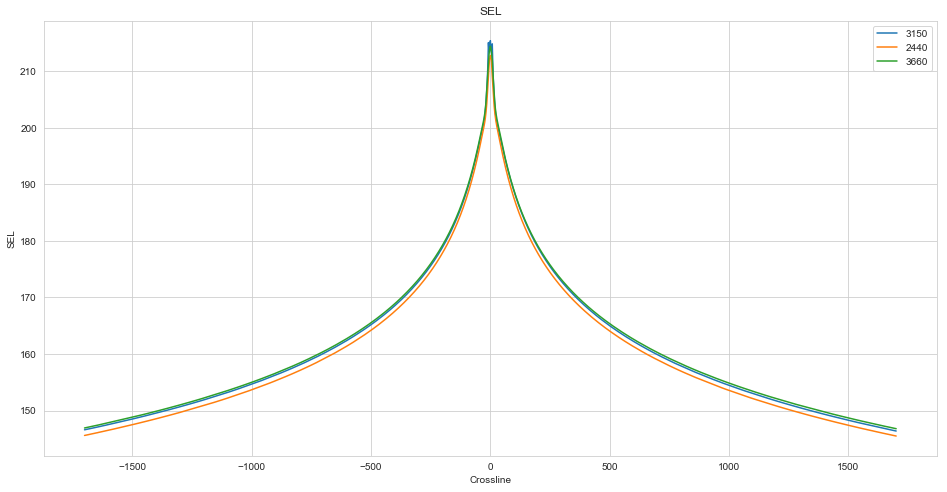

In [145]:
plot_xl_il(df_dict_SEL_il_near, 'Crossline', 'SEL')

In [157]:
def printval(df_dict, xlil, distance, attrib):
    for key in df_dict:
        df = df_dict[key]
        
        val1 = df[df[xlil] == distance][attrib].values[0]
        val2 = df[df[xlil] == -distance][attrib].values[0]
        avg = np.around((val1 + val2)/2)
        print(key, distance, avg)

In [170]:
printval(df_dict_SEL_xl_near, 'Inline', 1, 'SEL')
printval(df_dict_SEL_il_near, 'Crossline', 1, 'SEL')

3150 1 215.0
2440 1 213.0
3660 1 214.0
3150 1 215.0
2440 1 213.0
3660 1 214.0


In [171]:
printval(df_dict_SEL_xl_near, 'Inline', 750, 'SEL')
printval(df_dict_SEL_il_near, 'Crossline', 750, 'SEL')

3150 750 154.0
2440 750 152.0
3660 750 155.0
3150 750 159.0
2440 750 158.0
3660 750 159.0


In [172]:
printval(df_dict_SEL_xl_near, 'Inline', 1700, 'SEL')
printval(df_dict_SEL_il_near, 'Crossline', 1700, 'SEL')

3150 1700 142.0
2440 1700 139.0
3660 1700 143.0
3150 1700 146.0
2440 1700 146.0
3660 1700 147.0


In [173]:
printval(df_dict_SPL_xl_near, 'Inline', 1, 'SPL')
printval(df_dict_SPL_il_near, 'Crossline', 1, 'SPL')

3150 1 236.0
2440 1 236.0
3660 1 237.0
3150 1 235.0
2440 1 235.0
3660 1 236.0


In [176]:
printval(df_dict_SPL_xl_near, 'Inline', 750, 'SPL')
printval(df_dict_SPL_il_near, 'Crossline', 750, 'SPL')

3150 750 181.0
2440 750 179.0
3660 750 182.0
3150 750 185.0
2440 750 185.0
3660 750 185.0


In [177]:
printval(df_dict_SPL_xl_near, 'Inline', 1700, 'SPL')
printval(df_dict_SPL_il_near, 'Crossline', 1700, 'SPL')

3150 1700 169.0
2440 1700 166.0
3660 1700 169.0
3150 1700 173.0
2440 1700 173.0
3660 1700 173.0


In [178]:
printval(df_dict_SEL_inline, 'Inline', 10000, 'SEL')
printval(df_dict_SEL_xline, 'Crossline', 10000, 'SEL')

3150 10000 114.0
2440 10000 112.0
3660 10000 116.0
3150 10000 120.0
2440 10000 119.0
3660 10000 120.0


In [179]:
printval(df_dict_SPL_inline, 'Inline', 10000, 'SPL')
printval(df_dict_SPL_xline, 'Crossline', 10000, 'SPL')

3150 10000 142.0
2440 10000 139.0
3660 10000 142.0
3150 10000 146.0
2440 10000 146.0
3660 10000 146.0
